<a href="https://colab.research.google.com/github/Archit-175/GoogleColab/blob/main/K_Mean_Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline


In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

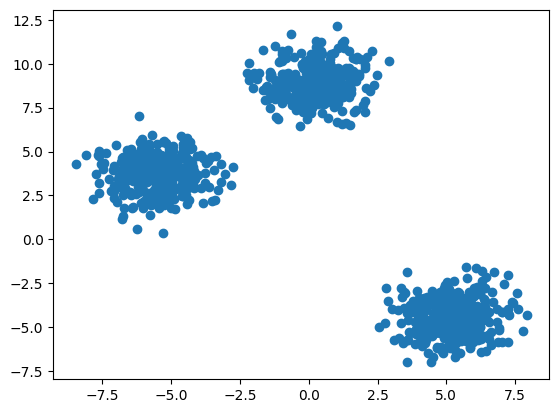

In [4]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
 from sklearn.cluster import KMeans

Manual Process\
Elbow Method to select the K value

In [8]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)



In [9]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1005.8068604073605,
 911.735402028195,
 764.5007319009126,
 670.5730479240511,
 681.4749040881889,
 543.0818237137759]

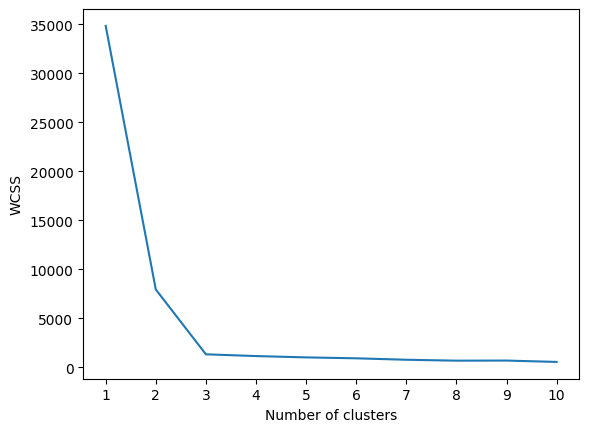

In [10]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [11]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [12]:
y_labels=kmeans.fit_predict(X_train)

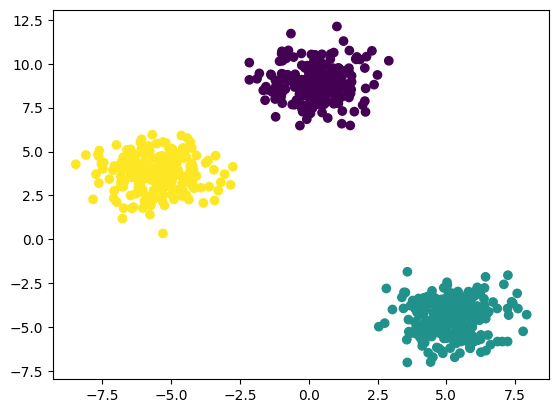

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [14]:
y_test_labels=kmeans.predict(X_test)

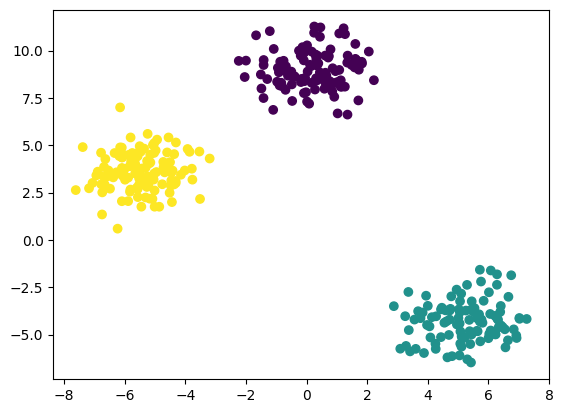

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [17]:
##Knee Locator

!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
 kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
 kl.elbow

3

In [21]:
## performance metrics
##silhoutte score
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6505454471731087,
 0.4462311704778007,
 0.4810988904397219,
 0.4731812348320528,
 0.32061243631887953,
 0.34651811680098216,
 0.33768841147728706]

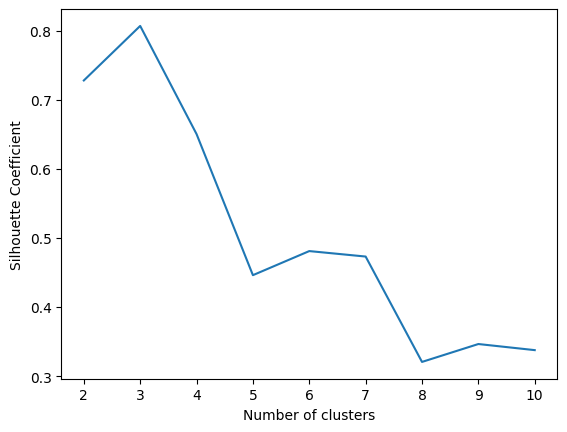

In [24]:
##plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()